In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix



In [3]:
#csr_matrix 是处理稀疏矩阵的方式,[0,0]=1, [0,2] = 2, [1,2] = 3
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
a = csr_matrix((data, (row, col)), shape=(3, 3)).toarray()
print(a)

[[1 0 2]
 [0 0 3]
 [4 5 6]]


In [4]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# Import the ratings dataset
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100004  ratings of  9125  movies.


In [34]:
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:
        movie_type = movies[movies['genres'].str.contains(genre)]
        user_rating_for_movie_type = ratings[ratings['movieId'].isin(movie_type['movieId'])].loc[:,['userId','rating']].groupby('userId')['rating'].mean().round(2)
        genre_ratings = pd.concat([genre_ratings, user_rating_for_movie_type], axis = 1)
    
    genre_ratings.columns = column_names
    
    return genre_ratings




In [36]:
genre_ratings = get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
userId,,
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


In [67]:
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset = genre_ratings[
        ((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_scifi_rating'] > score_limit_2)) |             ((genre_ratings['avg_scifi_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset

In [70]:
biased_dataset = bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  183


,userId,avg_romance_rating,avg_scifi_rating
0,1,3.50,2.40
1,3,3.65,3.14
2,6,2.90,2.75
3,7,2.93,3.36
4,12,2.89,2.62


In [93]:
%matplotlib inline
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    plt.xlim(0,5)
    plt.ylim(0,5)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    ax.scatter(x_data, y_data)



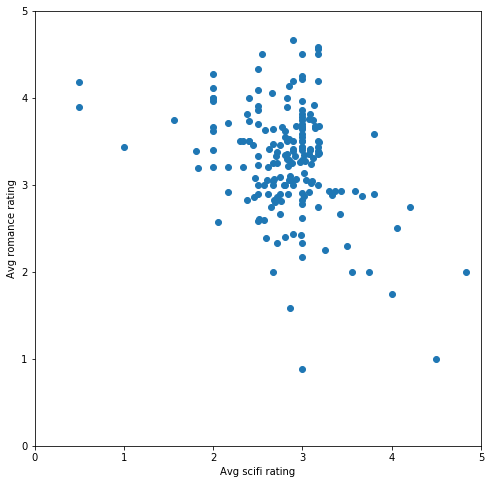

In [94]:
%matplotlib inline

#draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')
x_data = biased_dataset['avg_scifi_rating']
x_label = 'Avg scifi rating'
y_data = biased_dataset['avg_romance_rating']
y_label = 'Avg romance rating'
draw_scatterplot(x_data, x_label, y_data, y_label)

In [97]:
X = biased_dataset[['avg_scifi_rating', 'avg_romance_rating']].values
X

array([[2.4 , 3.5 ],
       [3.14, 3.65],
       [2.75, 2.9 ],
       [3.36, 2.93],
       [2.62, 2.89],
       [2.51, 2.61],
       [3.12, 3.31],
       [3.07, 3.76],
       [3.17, 3.  ],
       [3.  , 0.88],
       [2.83, 3.3 ],
       [2.17, 2.92],
       [3.  , 4.25],
       [2.7 , 3.33],
       [2.  , 3.96],
       [3.12, 3.75],
       [2.65, 2.75],
       [3.09, 3.41],
       [3.43, 2.93],
       [2.72, 2.33],
       [2.5 , 4.33],
       [2.77, 3.67],
       [2.89, 3.  ],
       [2.93, 3.68],
       [3.02, 2.87],
       [2.38, 3.81],
       [4.06, 2.5 ],
       [3.17, 3.35],
       [3.  , 2.17],
       [0.5 , 4.18],
       [3.14, 3.68],
       [2.75, 3.09],
       [3.  , 4.22],
       [2.  , 3.4 ],
       [3.18, 3.39],
       [2.98, 2.42],
       [2.67, 3.  ],
       [2.57, 2.6 ],
       [2.55, 4.5 ],
       [3.59, 2.93],
       [3.02, 3.14],
       [3.17, 4.56],
       [2.5 , 4.09],
       [3.  , 3.29],
       [2.83, 3.89],
       [2.99, 2.91],
       [2.5 , 3.  ],
       [3.  ,

In [124]:
def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
    

    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['avg_scifi_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap=cmap)

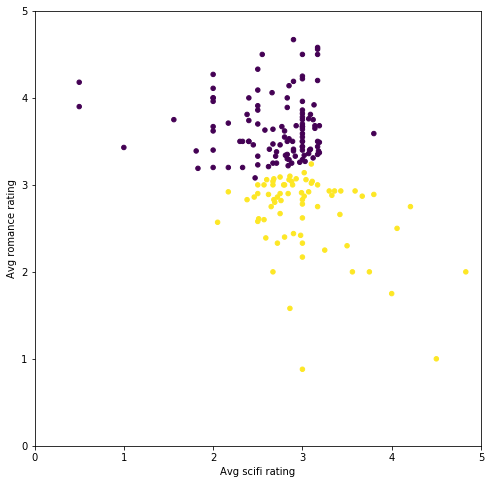

In [125]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(n_clusters=2)
predictions = kmeans_1.fit_predict(X)

draw_clusters(biased_dataset, predictions, cmap='viridis')

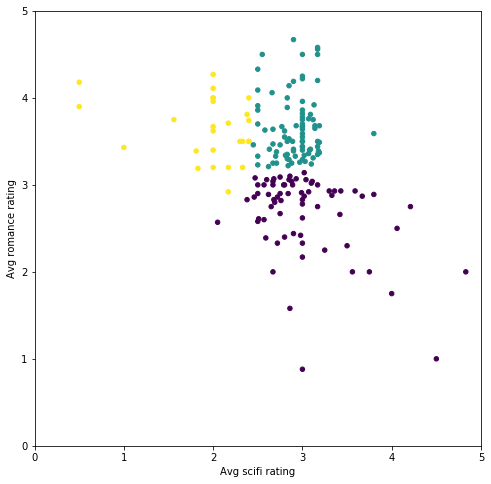

In [127]:
kmeans_2 = KMeans(n_clusters=3)
predictions = kmeans_2.fit_predict(X)
draw_clusters(biased_dataset, predictions, cmap='viridis')

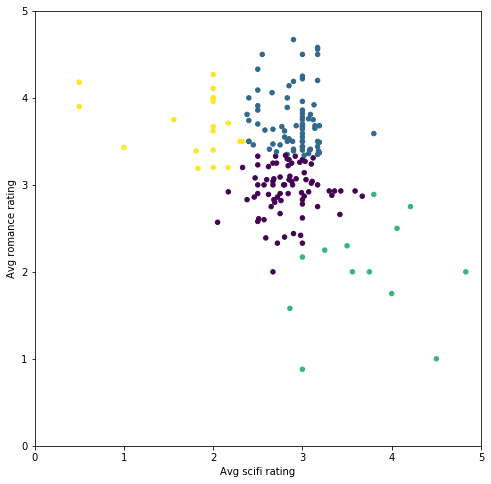

In [131]:
# TODO: Create an instance of KMeans to find four clusters
kmeans_3 = KMeans(n_clusters=4)

# TODO: use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit(X)
predictions_3 = predictions_3.predict(X)

# Plot
draw_clusters(biased_dataset, predictions_3)

In [164]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score


def clustering_errors(k, data):
    kmeans = KMeans(n_clusters=k).fit(data)
    predictions = kmeans.predict(data)

    silhouette_avg = silhouette_score(data, predictions)
    return silhouette_avg


In [165]:

possible_k_values = range(2, len(X) + 1, 5)

errors_per_k = [clustering_errors(k, X) for k in possible_k_values]
errors_per_k



/Users/cjz/miniconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (178) found smaller than n_clusters (182). Possibly due to duplicate points in X.
  return_n_iter=True)


[0.3558817876472827,
 0.3762307975680848,
 0.35203363559719064,
 0.3717893426603359,
 0.3661072769457398,
 0.3677327733158063,
 0.3788669676836965,
 0.3854908491357367,
 0.3835755159425706,
 0.3671427303895508,
 0.3701929178250974,
 0.37000139158716067,
 0.35034519084662147,
 0.3553209834371196,
 0.35330625626170453,
 0.342013593608154,
 0.3409797156597648,
 0.3432624300084719,
 0.3265629380843715,
 0.3276352390608395,
 0.2955960961632499,
 0.305147706719056,
 0.2936833902740331,
 0.2766226417278375,
 0.2689932432969173,
 0.2553177314645363,
 0.2477231043065126,
 0.2328901769780034,
 0.21347481133894336,
 0.20548904981511043,
 0.18722856283664085,
 0.16168880904177493,
 0.1466567629012301,
 0.12920960729960135,
 0.09984309419920603,
 0.0642301201631745,
 0.0546448087431694]

In [167]:
list(zip(possible_k_values, errors_per_k))

[(2, 0.3558817876472827),
 (7, 0.3762307975680848),
 (12, 0.35203363559719064),
 (17, 0.3717893426603359),
 (22, 0.3661072769457398),
 (27, 0.3677327733158063),
 (32, 0.3788669676836965),
 (37, 0.3854908491357367),
 (42, 0.3835755159425706),
 (47, 0.3671427303895508),
 (52, 0.3701929178250974),
 (57, 0.37000139158716067),
 (62, 0.35034519084662147),
 (67, 0.3553209834371196),
 (72, 0.35330625626170453),
 (77, 0.342013593608154),
 (82, 0.3409797156597648),
 (87, 0.3432624300084719),
 (92, 0.3265629380843715),
 (97, 0.3276352390608395),
 (102, 0.2955960961632499),
 (107, 0.305147706719056),
 (112, 0.2936833902740331),
 (117, 0.2766226417278375),
 (122, 0.2689932432969173),
 (127, 0.2553177314645363),
 (132, 0.2477231043065126),
 (137, 0.2328901769780034),
 (142, 0.21347481133894336),
 (147, 0.20548904981511043),
 (152, 0.18722856283664085),
 (157, 0.16168880904177493),
 (162, 0.1466567629012301),
 (167, 0.12920960729960135),
 (172, 0.09984309419920603),
 (177, 0.0642301201631745),
 (182,

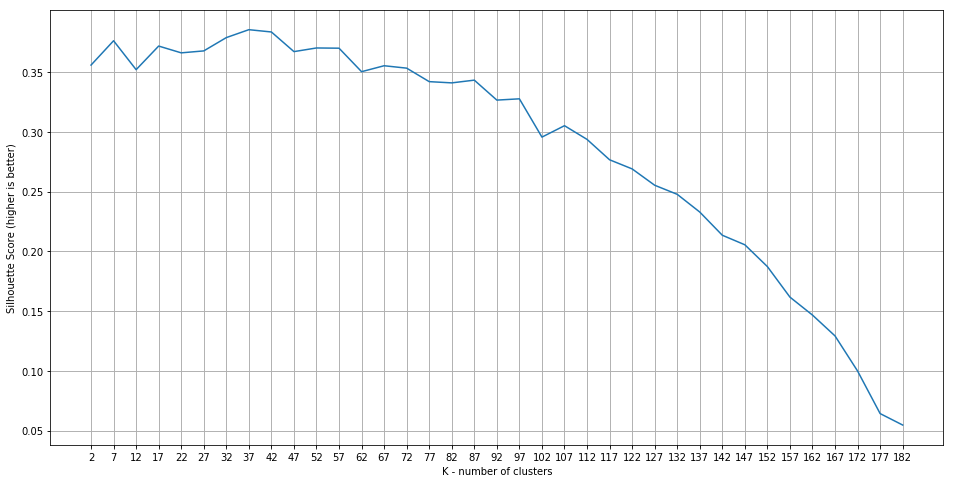

In [174]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score (higher is better)')
ax.plot(possible_k_values, errors_per_k)

xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

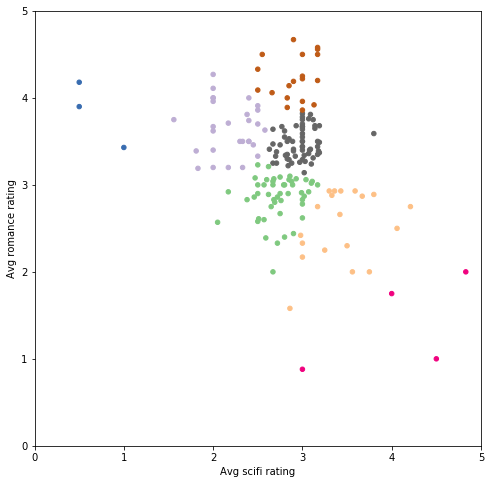

In [175]:
# TODO: Create an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters=7)

# TODO: use fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)

# plot
draw_clusters(biased_dataset, predictions_4, cmap='Accent') 

In [180]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [183]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies, 
                                                     ['Romance', 'Sci-Fi', 'Action'], 
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()  

Number of records:  183


,userId,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,1,3.50,2.40,2.80
1,3,3.65,3.14,3.47
2,6,2.90,2.75,3.27
3,7,2.93,3.36,3.29
4,12,2.89,2.62,3.21


In [187]:
X_with_action = biased_dataset_3_genres[['avg_romance_rating','avg_scifi_rating','avg_action_rating']].values

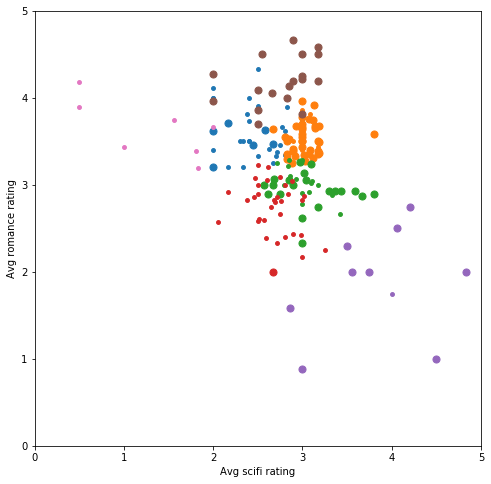

In [188]:
# TODO: Create an instance of KMeans to find seven clusters
kmeans_5 = KMeans(n_clusters=7)

# TODO: use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X_with_action)

# plot
helper.draw_clusters_3d(biased_dataset_3_genres, predictions_5)

In [190]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [191]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [339]:
ratings_title = pd.merge(ratings, movies[['movieId', 'title']],  on= 'movieId')
ratings_title.head()

,userId,movieId,rating,timestamp,title
0,1,31,2.5,1260759144,Dangerous Minds (1995)
1,7,31,3.0,851868750,Dangerous Minds (1995)
2,31,31,4.0,1273541953,Dangerous Minds (1995)
3,32,31,4.0,834828440,Dangerous Minds (1995)
4,36,31,3.0,847057202,Dangerous Minds (1995)


In [340]:
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')



n_movies = 30
n_users = 18
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (671, 9064) 

Subset example:


title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


In [341]:
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index = True)
    user_movie_ratings_sorted = user_movie_ratings.sort_values(by = len(user_movie_ratings) - 1, axis = 1, ascending = False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    most_rated_movies = user_movie_ratings_sorted.iloc[:, : max_number_of_movies]
    return most_rated_movies

In [342]:
most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
most_rated_movies

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Dances with Wolves (1990),Fight Club (1999),"Usual Suspects, The (1995)",Seven (a.k.a. Se7en) (1995),"Lion King, The (1994)","Godfather, The (1972)","Lord of the Rings: The Fellowship of the Ring, The (2001)",Apollo 13 (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,4.0,NaN,3.0,NaN,4.0,NaN,NaN,4.0,5.0,...,5.0,NaN,4.0,4.0,3.0,NaN,NaN,5.0,NaN,NaN
2,5.0,4.5,5.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,...,3.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,3.0,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,2.5,NaN,4.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,NaN,5.0,NaN,5.0,4.0,NaN,3.0,NaN,3.0,...,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN
7,4.0,4.0,5.0,4.5,3.5,NaN,5.0,NaN,5.0,4.0,...,NaN,4.0,5.0,5.0,NaN,5.0,3.5,NaN,NaN,5.0
8,NaN,NaN,4.0,4.0,NaN,NaN,5.0,4.0,5.0,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [343]:
def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis = 1))
    most_rated_movies = most_rated_movies.sort_values(by = 'counts', ascending = False)
    most_rated_movies_users_selection = most_rated_movies.iloc[:max_number_of_movies, :]
    most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis = 1)
    return most_rated_movies_users_selection

In [344]:
most_rated_movies_users_selection = get_users_who_rate_the_most(most_rated_movies, n_users)
most_rated_movies_users_selection

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Dances with Wolves (1990),Fight Club (1999),"Usual Suspects, The (1995)",Seven (a.k.a. Se7en) (1995),"Lion King, The (1994)","Godfather, The (1972)","Lord of the Rings: The Fellowship of the Ring, The (2001)",Apollo 13 (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
29,5.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,5.0,4.0,5.0,4.0,3.0,5.0,3.0,5.0,4.0,2.0
508,4.0,5.0,4.0,4.0,5.0,3.0,4.5,3.0,5.0,2.0,...,5.0,4.0,5.0,4.0,3.5,5.0,4.5,3.0,2.0,4.0
14,1.0,5.0,2.0,5.0,5.0,3.0,5.0,2.0,4.0,4.0,...,3.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0
72,5.0,5.0,5.0,4.5,4.5,4.0,4.5,5.0,5.0,3.0,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,3.5,3.0,5.0
653,4.0,5.0,5.0,4.5,5.0,4.5,5.0,5.0,5.0,5.0,...,4.5,5.0,5.0,4.5,5.0,4.5,5.0,5.0,4.0,5.0
22,4.5,4.5,5.0,4.5,4.5,3.5,4.0,3.0,3.5,3.5,...,2.5,3.5,4.0,4.5,NaN,5.0,4.0,3.5,4.0,4.0
460,4.0,4.5,5.0,5.0,4.5,5.0,4.5,3.5,4.0,5.0,...,4.0,5.0,4.0,5.0,1.5,5.0,4.5,3.0,2.5,NaN
267,5.0,5.0,3.5,5.0,5.0,4.5,4.5,5.0,5.0,5.0,...,NaN,4.5,3.5,4.0,5.0,4.5,5.0,4.5,4.0,3.0
561,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.5,4.0,5.0,...,4.0,4.5,5.0,4.5,4.5,4.0,5.0,4.5,4.0,4.0
354,5.0,4.5,5.0,4.5,5.0,3.5,5.0,3.0,4.0,4.0,...,4.0,5.0,3.5,5.0,4.0,5.0,4.5,3.0,3.5,4.0


In [345]:
ratings_title.head()

,userId,movieId,rating,timestamp,title
0,1,31,2.5,1260759144,Dangerous Minds (1995)
1,7,31,3.0,851868750,Dangerous Minds (1995)
2,31,31,4.0,1273541953,Dangerous Minds (1995)
3,32,31,4.0,834828440,Dangerous Minds (1995)
4,36,31,3.0,847057202,Dangerous Minds (1995)


In [347]:
user_movie_ratings =  pd.pivot_table(ratings_title, index = 'userId', columns = 'title', values='rating')
user_movie_ratings.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [350]:
most_rated_movies_1k = get_most_rated_movies(user_movie_ratings, 1000)
most_rated_movies_1k.head()

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,4.0,NaN,3.0,NaN,4.0,NaN,NaN,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,4.5,5.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [352]:
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())
sparse_ratings

<671x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 62397 stored elements in Compressed Sparse Row format>

In [354]:
predictions = KMeans(n_clusters = 20, algorithm='full').fit_predict(sparse_ratings)


/Users/cjz/udac/machine_learning/machine-learning-1/projects/k-means-clustering-movie-ratings-master/helper.py:117: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
/Users/cjz/udac/machine_learning/machine-learning-1/projects/k-means-clustering-movie-ratings-master/helper.py:118: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
/Users/cjz/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


cluster # 17
# of users in cluster: 275. # of users in plot: 70


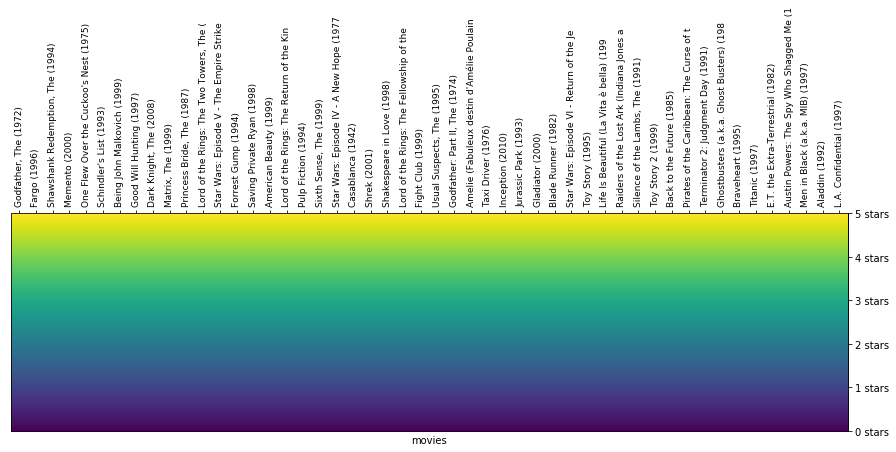

cluster # 10
# of users in cluster: 80. # of users in plot: 70


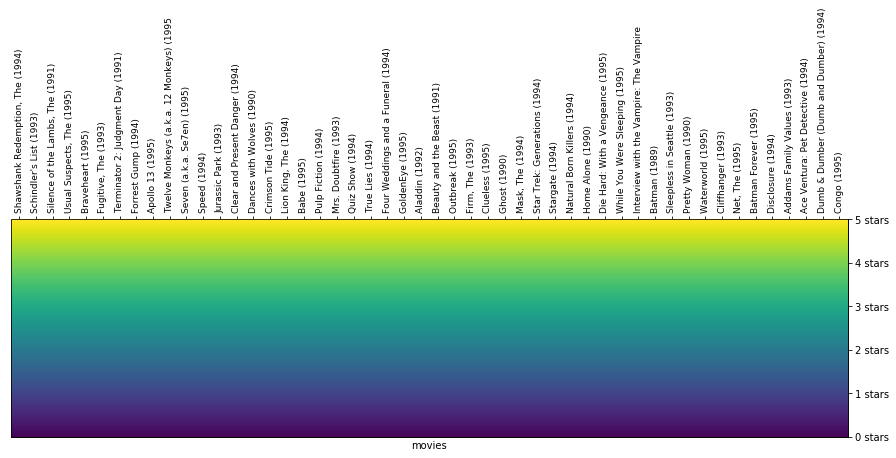

cluster # 1
# of users in cluster: 52. # of users in plot: 52


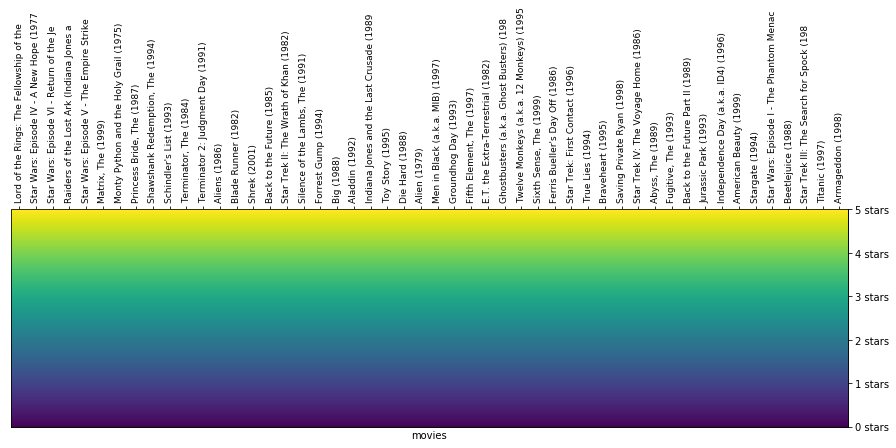

cluster # 7
# of users in cluster: 73. # of users in plot: 70


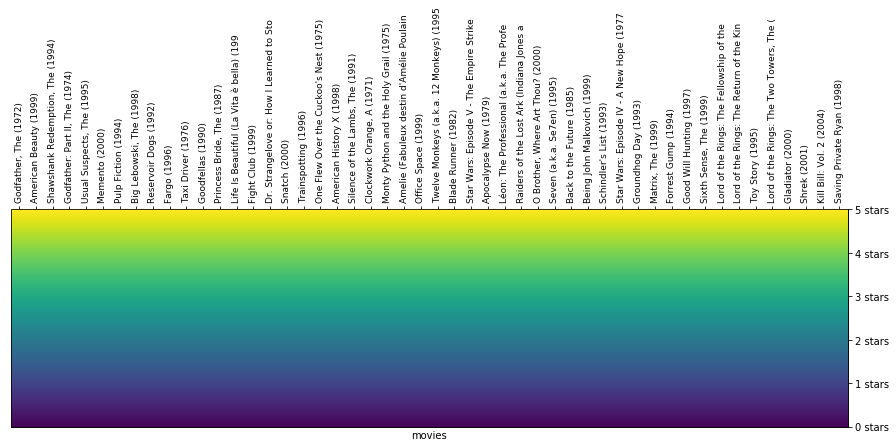

cluster # 8
# of users in cluster: 37. # of users in plot: 37


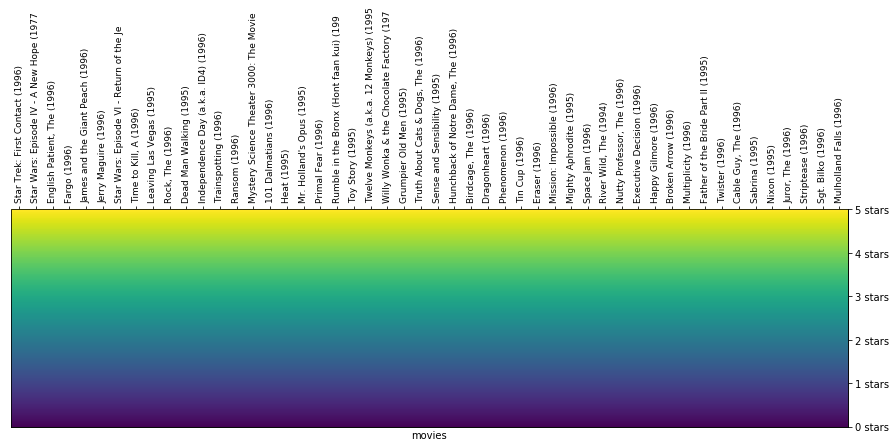

cluster # 16
# of users in cluster: 32. # of users in plot: 32


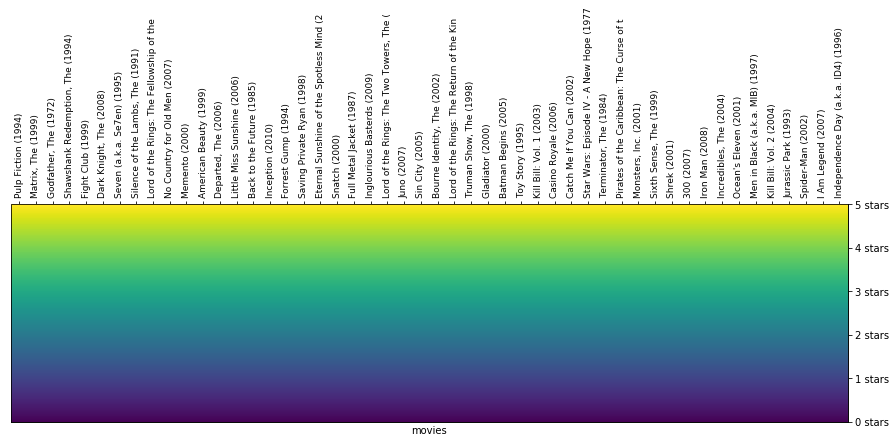

cluster # 0
# of users in cluster: 34. # of users in plot: 34


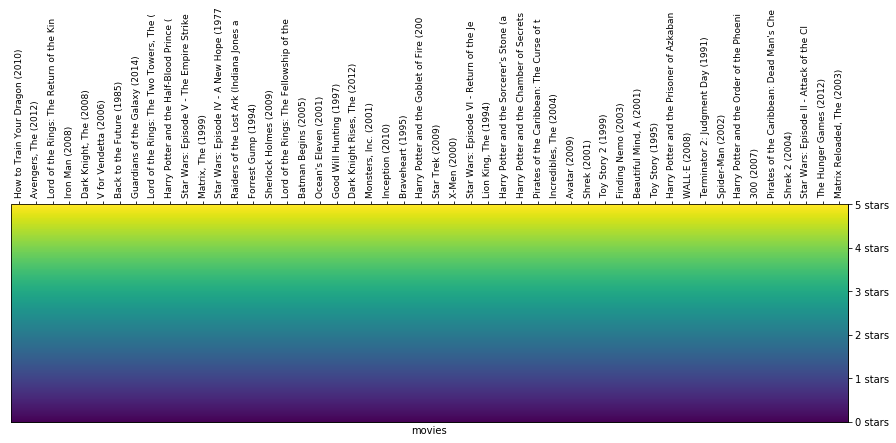

cluster # 9
# of users in cluster: 32. # of users in plot: 32


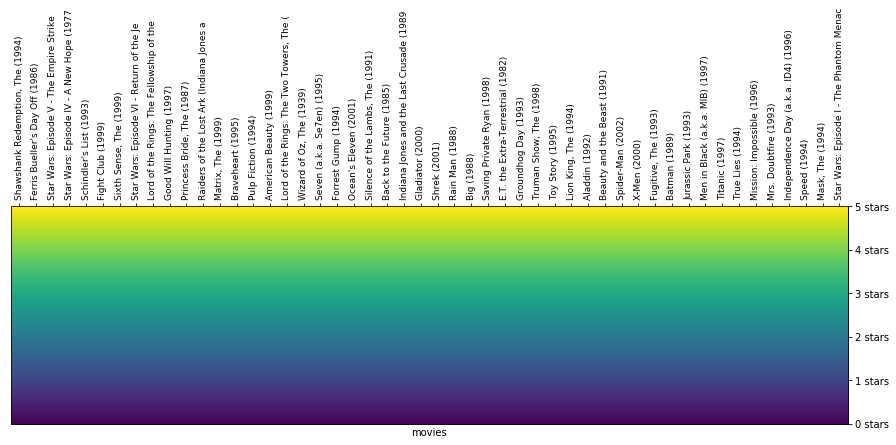

cluster # 6
# of users in cluster: 16. # of users in plot: 16


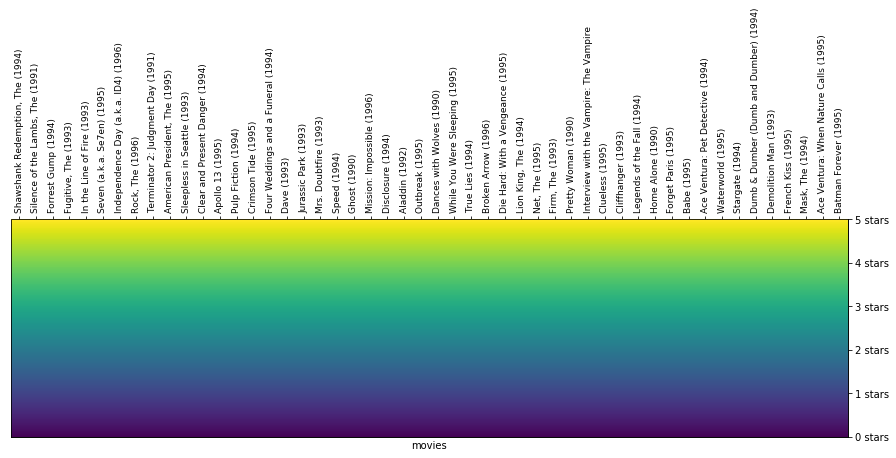

In [361]:
max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis = 1)
helper.draw_movie_clusters(clustered, max_users, max_movies)